In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [43]:
train = pd.read_csv("titanic_train.csv")

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

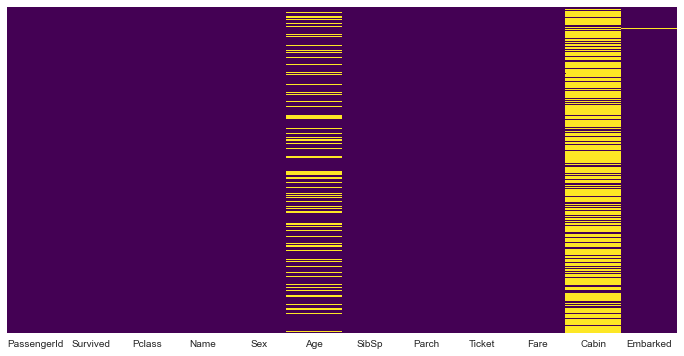

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [47]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

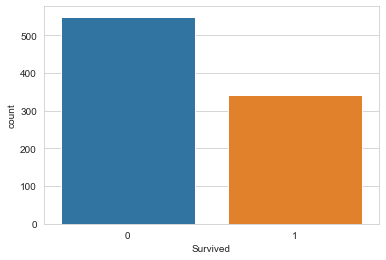

In [48]:
sns.countplot(x='Survived', data=train) #dados de pessoas que sobreviveram

<AxesSubplot:xlabel='Survived', ylabel='count'>

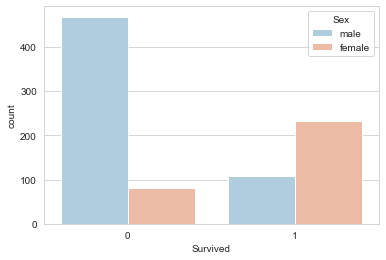

In [49]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

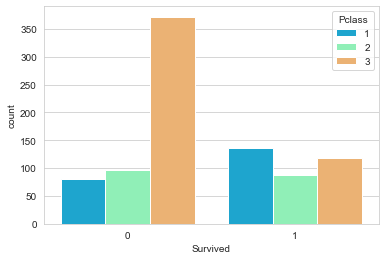

In [50]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

<AxesSubplot:>

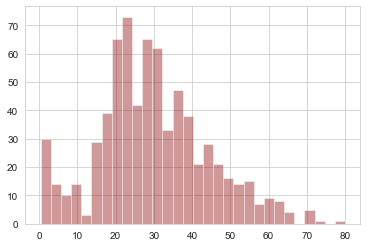

In [51]:
train['Age'].hist(bins=30, color='darkred', alpha=0.4) 
#idade das pessoas

<AxesSubplot:xlabel='SibSp', ylabel='count'>

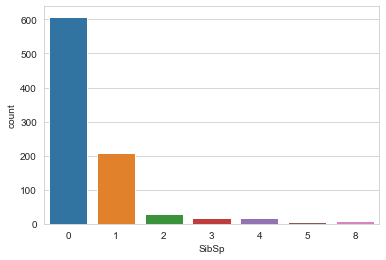

In [52]:
sns.countplot(x='SibSp', data=train) #quantidade de pessoas acompanhadas

<AxesSubplot:>

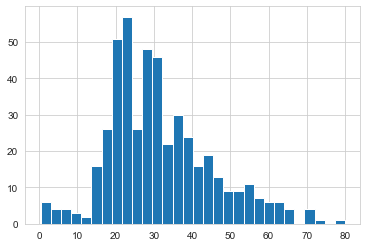

In [54]:
train[train['SibSp'] == 0]['Age'].hist(bins=30)

<AxesSubplot:>

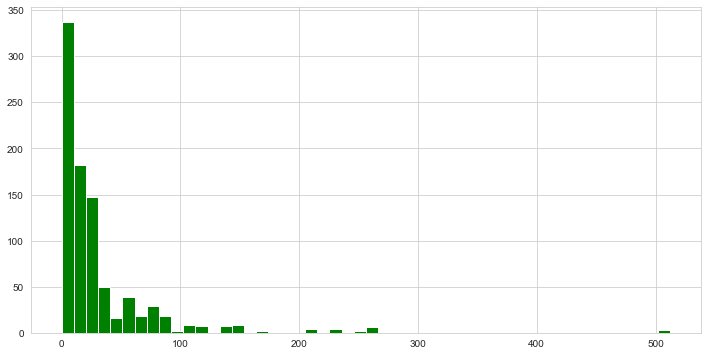

In [55]:
train['Fare'].hist(color='green', bins=50, figsize=(12, 6)) 

# Regressão Logistica Parte 2

 Limpando nossos dados para melhor utilizarmos


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

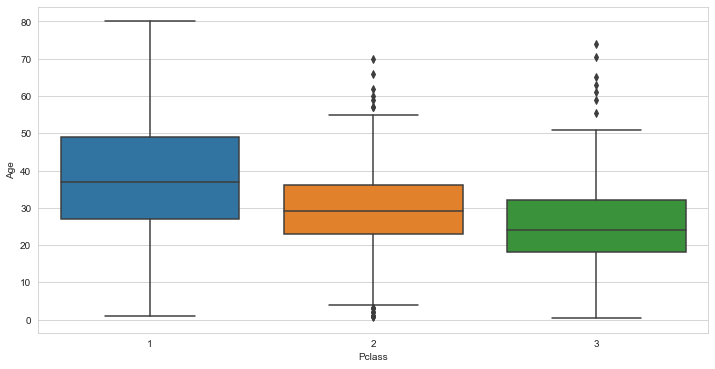

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=train)

In [57]:
def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [58]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1)

In [59]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

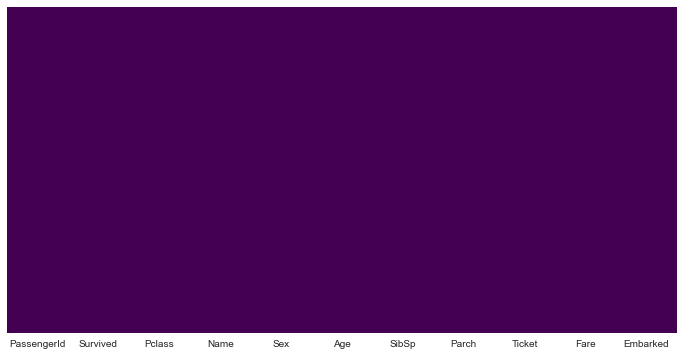

In [64]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [61]:
del train['Cabin']  #deletando dados
#train.drop('Cabin', inplace=True)

In [63]:
train.dropna(inplace=True) #apaga linhas que contem quallquer tipo de info false

In [68]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [72]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [73]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [75]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [77]:
train = pd.concat([train, sex, embark], axis=1)

In [79]:
train.head(15)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1
5,0,3,24.0,0,0,8.4583,Q,1,1,0
6,0,1,54.0,0,0,51.8625,S,1,0,1
7,0,3,2.0,3,1,21.0750,S,1,0,1
8,1,3,27.0,0,2,11.1333,S,0,0,1
9,1,2,14.0,1,0,30.0708,C,0,0,0


# Regressão Logistica Parte 3

In [80]:
del train['Embarked']

In [81]:
train.head(20)  #somente valores numericos 

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

In [105]:
logmodel = LogisticRegression()

LogisticRegression()

In [106]:
logmodel.fit( X_train, y_train )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
prections = logmodel.predict(X_test)

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(y_test, prections))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       165
           1       0.80      0.69      0.74       102

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
print(confusion_matrix(y_test, prections))

[[147  18]
 [ 32  70]]
